# Определение стоимости автомобилей

# Описание проекта
Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля. 

Построить модель, которая умеет её определять. В нашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.

Критерии, которые важны заказчику:
- качество предсказания;
- время обучения модели;
- время предсказания модели.

# План по выполнению проекта

Чтобы усилить исследование, не ограничивайтесь градиентным бустингом. Попробуем более простые модели — иногда они работают лучше. Эти редкие случаи легко пропустить, если всегда применять только бустинг.

Поэкспериментируем и сравним характеристики моделей: время обучения, время предсказания, точность результата.

Основные шаги:

1. Загрузить данные, путь к файлу: `datasets/autos.csv`.
1. Изучить данные. Заполнить пропущенные значения и обработать аномалии в столбцах. Если среди признаков имеются неинформативные, удалить их.
1. Подготовить выборки для обучения моделей.
1. Обучить разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробовать разные гиперпараметры.
1. Проанализировать время обучения, время предсказания и качество моделей.
1. Опираясь на критерии заказчика, выбрать лучшую модель, проверить её качество на тестовой выборке.

Примечания:

1. Для оценки качества моделей применять метрику `RMSE`.
1. Значение метрики `RMSE` должно быть меньше `2500`.
1. Самостоятельно освоить библиотеку LightGBM и её средствами построить модели градиентного бустинга.
1. Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найти её.
1. Модель градиентного бустинга может долго обучаться, поэтому можно изменить у неё только два-три параметра.
1. Если перестанет работать Jupyter Notebook, можно удалить лишние переменные оператором del.

`del features_train`

# Описание данных

Данные находятся в файле `/datasets/autos.csv`.

**Признаки**: 
- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `Repaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

**Целевой признак:** 
- `Price` — цена (евро)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузим-данные" data-toc-modified-id="Загрузим-данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузим данные</a></span></li><li><span><a href="#Изучим-данные" data-toc-modified-id="Изучим-данные-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучим данные</a></span></li><li><span><a href="#Заполним-пропущенные-значения-и-обработаем-аномалии-в-столбцах.-Если-среди-признаков-имеются-неинформативные,-то-удалим-их." data-toc-modified-id="Заполним-пропущенные-значения-и-обработаем-аномалии-в-столбцах.-Если-среди-признаков-имеются-неинформативные,-то-удалим-их.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Заполним пропущенные значения и обработаем аномалии в столбцах. Если среди признаков имеются неинформативные, то удалим их.</a></span><ul class="toc-item"><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Пропущенные значения</a></span><ul class="toc-item"><li><span><a href="#Радикальный-метод" data-toc-modified-id="Радикальный-метод-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Радикальный метод</a></span></li><li><span><a href="#Второй-способ---заполнение-&quot;unknown&quot;-или-медианным-значением" data-toc-modified-id="Второй-способ---заполнение-&quot;unknown&quot;-или-медианным-значением-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Второй способ - заполнение <code>"unknown"</code> или медианным значением</a></span></li></ul></li><li><span><a href="#Уникальные-значения" data-toc-modified-id="Уникальные-значения-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Уникальные значения</a></span></li><li><span><a href="#Дублирующие-значения" data-toc-modified-id="Дублирующие-значения-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Дублирующие значения</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Прямое-кодирование---One-Hot-Encoding" data-toc-modified-id="Прямое-кодирование---One-Hot-Encoding-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Прямое кодирование - One-Hot Encoding</a></span><ul class="toc-item"><li><span><a href="#Деление-на-обучающей-и-валидационной-выборки" data-toc-modified-id="Деление-на-обучающей-и-валидационной-выборки-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Деление на обучающей и валидационной выборки</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>LinearRegression</a></span></li></ul></li><li><span><a href="#Порядковое-кодирование---OrdinalEncoder" data-toc-modified-id="Порядковое-кодирование---OrdinalEncoder-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Порядковое кодирование - OrdinalEncoder</a></span><ul class="toc-item"><li><span><a href="#Кодирование-признаков---деление-на-обучающей-и-валидационной-выборки" data-toc-modified-id="Кодирование-признаков---деление-на-обучающей-и-валидационной-выборки-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Кодирование признаков - деление на обучающей и валидационной выборки</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LightGBMRegressor" data-toc-modified-id="LightGBMRegressor-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>LightGBMRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li><li><span><a href="#Масштабирование-признаков---StandardScaler" data-toc-modified-id="Масштабирование-признаков---StandardScaler-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Масштабирование признаков - StandardScaler</a></span><ul class="toc-item"><li><span><a href="#Масштабируем-One-Hot-Encoding" data-toc-modified-id="Масштабируем-One-Hot-Encoding-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Масштабируем One-Hot Encoding</a></span><ul class="toc-item"><li><span><a href="#Деление-на-обучающей-и-валидационной-выборки" data-toc-modified-id="Деление-на-обучающей-и-валидационной-выборки-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>Деление на обучающей и валидационной выборки</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-2.3.1.2"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>LinearRegression</a></span></li></ul></li><li><span><a href="#Масштабируем-OrdinalEncoder" data-toc-modified-id="Масштабируем-OrdinalEncoder-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Масштабируем OrdinalEncoder</a></span><ul class="toc-item"><li><span><a href="#Деление-на-обучающей-и-валидационной-выборки" data-toc-modified-id="Деление-на-обучающей-и-валидационной-выборки-2.3.2.1"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Деление на обучающей и валидационной выборки</a></span></li><li><span><a href="#Кодируем-признаки" data-toc-modified-id="Кодируем-признаки-2.3.2.2"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Кодируем признаки</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-2.3.2.3"><span class="toc-item-num">2.3.2.3&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-2.3.2.4"><span class="toc-item-num">2.3.2.4&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LightGBMRegressor" data-toc-modified-id="LightGBMRegressor-2.3.2.5"><span class="toc-item-num">2.3.2.5&nbsp;&nbsp;</span>LightGBMRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-2.3.2.6"><span class="toc-item-num">2.3.2.6&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Подготовка данных

In [1]:
! pip install -q jupyternotify

In [2]:
# Уведомление о завершение работы определенного ячейка (очень пригодится для машинного обучения)
import jupyternotify
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [1]:
# Подключаем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

# Время обучения модели
import timeit
from lightgbm import LGBMRegressor
# Вызов библиотеки для отключения предупреждения
import warnings

# Разбиение на обучающую, валидационную и тестовую выборку и кроссвалидацию для повышения качеств обучения
from sklearn.model_selection import train_test_split, GridSearchCV
# Конвейер
from sklearn.pipeline import make_pipeline
# Масштабируемость модели
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# и для машинного обучения разными способами (по условию мы выбираем линейную регрессию):
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error

### Загрузим данные

In [4]:
# Получаем датасет
try:
    # С локального файла
    try:
        df = pd.read_csv('datasets/autos.csv')
    except:
        df = pd.read_csv('/datasets/autos.csv')
except:
    print('Отсутствует датасет. Проверьте путь файла')

### Изучим данные

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

**Дополнительные информация:**

**Признаки**
- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `Repaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

**Целевой признак**
- `Price` — цена (евро)

In [6]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [7]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Тут можно заметить странное, что в колонке "год регистрации автомобиля" есть 1000 и 9999. Скорее всего это аномальное значения. Также в данный момент не существуют машин, у которых мощностей двигателя больше 143 л.с. А также странно получилось, что машина выставлена в продажах бесплатно. Ну, может быть они хотят быстрее избавиться от них, а может "ради прикола" выставили в продажах, но все равно устраняем их

Text(0, 0.5, 'Стоимость ЕВРО')

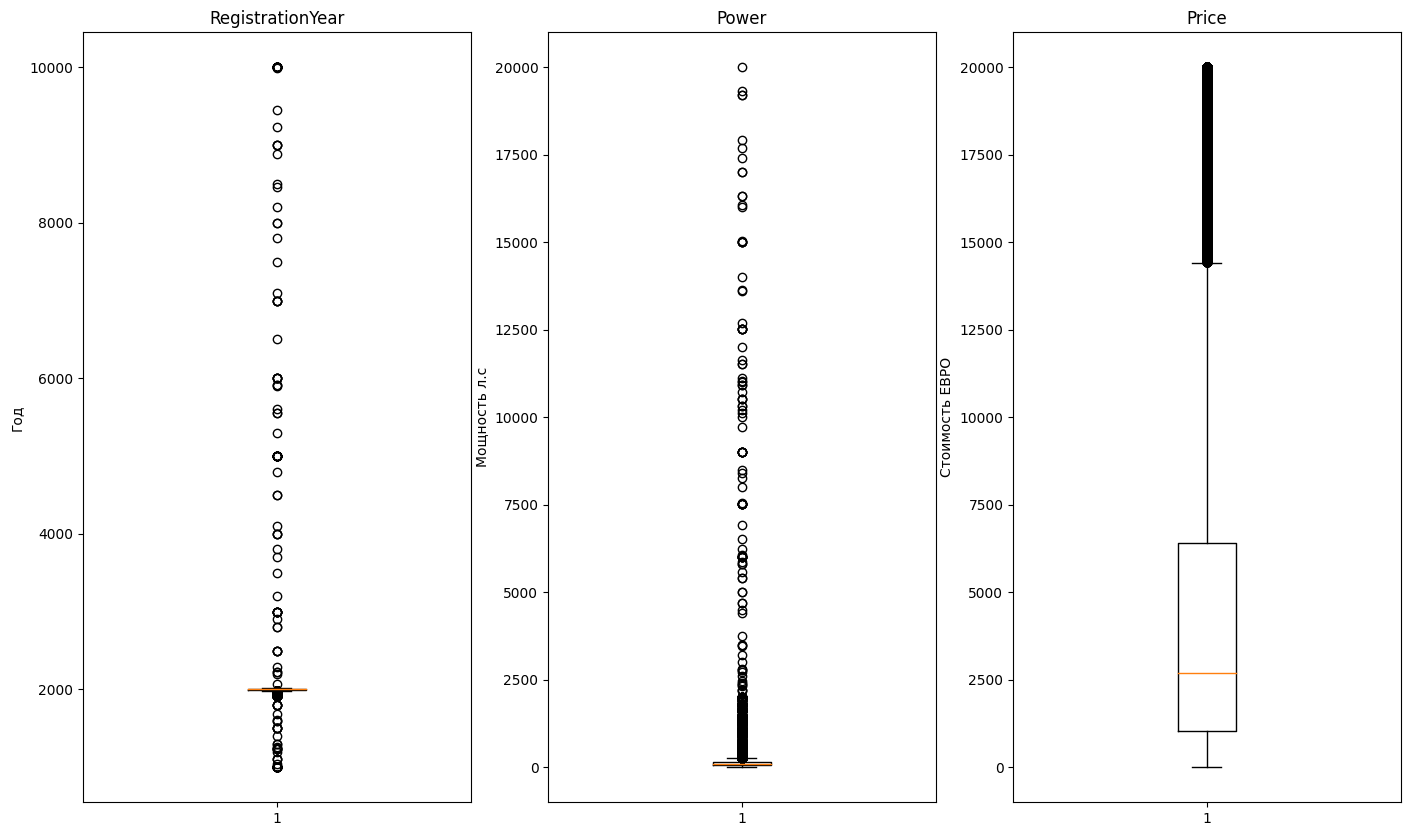

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(17, 10))

axs[0].boxplot(df['RegistrationYear'])
axs[0].set_title('RegistrationYear')
axs[0].set_ylabel('Год')
        
axs[1].boxplot(df['Power'])
axs[1].set_title('Power')
axs[1].set_ylabel('Мощность л.с')

axs[2].boxplot(df['Price'])
axs[2].set_title('Price')
axs[2].set_ylabel('Стоимость ЕВРО')

### Заполним пропущенные значения и обработаем аномалии в столбцах. Если среди признаков имеются неинформативные, то удалим их.

In [9]:
# Скорпируем
df_clean = df.copy()

Удаляем аномальные значения

In [10]:
# Смотрим дату скачивания анкеты из базы и год регистрации автомобиля, 
# т.к. год регистрации автомобиля не должен позже дату скачивания анкеты
df_clean['DateCrawled'].max()

'2016-04-07 14:36:58'

In [11]:
# Очистим
# Год регистрации автомобиля
df_clean = df_clean[df_clean['RegistrationYear'] > (df_clean.describe()['RegistrationYear']['50%'] - df_clean.describe()['RegistrationYear']['std'])]
df_clean = df_clean[df_clean['RegistrationYear'] < 2017]

In [12]:
# Мощность двигателя л.с
df_clean = df_clean[df_clean['Power'] > 5]

# В 2016 году шведский суперкар с названием Koenigsegg Regera имеет 1800 л.с. и двигатель у него является самым мощным в мире
df_clean = df_clean[df_clean['Power'] < 1800]

In [13]:
# Бесплатных автомобилей устраняем 
df_clean = df_clean[df_clean['Price'] > 1]

In [14]:
# Здесь можно заметить, что продается БМВ со стоимостью 2 евро)
df_clean[df_clean.index==3742]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
3742,2016-03-23 17:30:02,2,sedan,2002,auto,272,7er,5000,9,petrol,bmw,NaN,2016-03-23 00:00:00,0,65183,2016-03-24 21:28:34


In [15]:
df_clean.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,295937.000000,295937.000000,295937.000000,295937.000000,295937.000000,295937.0,295937.000000
mean,4865.070944,2002.823043,121.330158,128300.280127,5.996080,0.0,51241.180390
std,4611.936652,6.536964,60.845880,36737.164496,3.582654,0.0,25782.523619
min,2.000000,1923.000000,6.000000,5000.000000,0.000000,0.0,1067.000000
25%,1350.000000,1999.000000,75.000000,125000.000000,3.000000,0.0,30926.000000
50%,3200.000000,2003.000000,111.000000,150000.000000,6.000000,0.0,50259.000000
75%,6999.000000,2007.000000,150.000000,150000.000000,9.000000,0.0,72108.000000
max,20000.000000,2016.000000,1799.000000,150000.000000,12.000000,0.0,99998.000000


Text(0, 0.5, 'Стоимость ЕВРО')

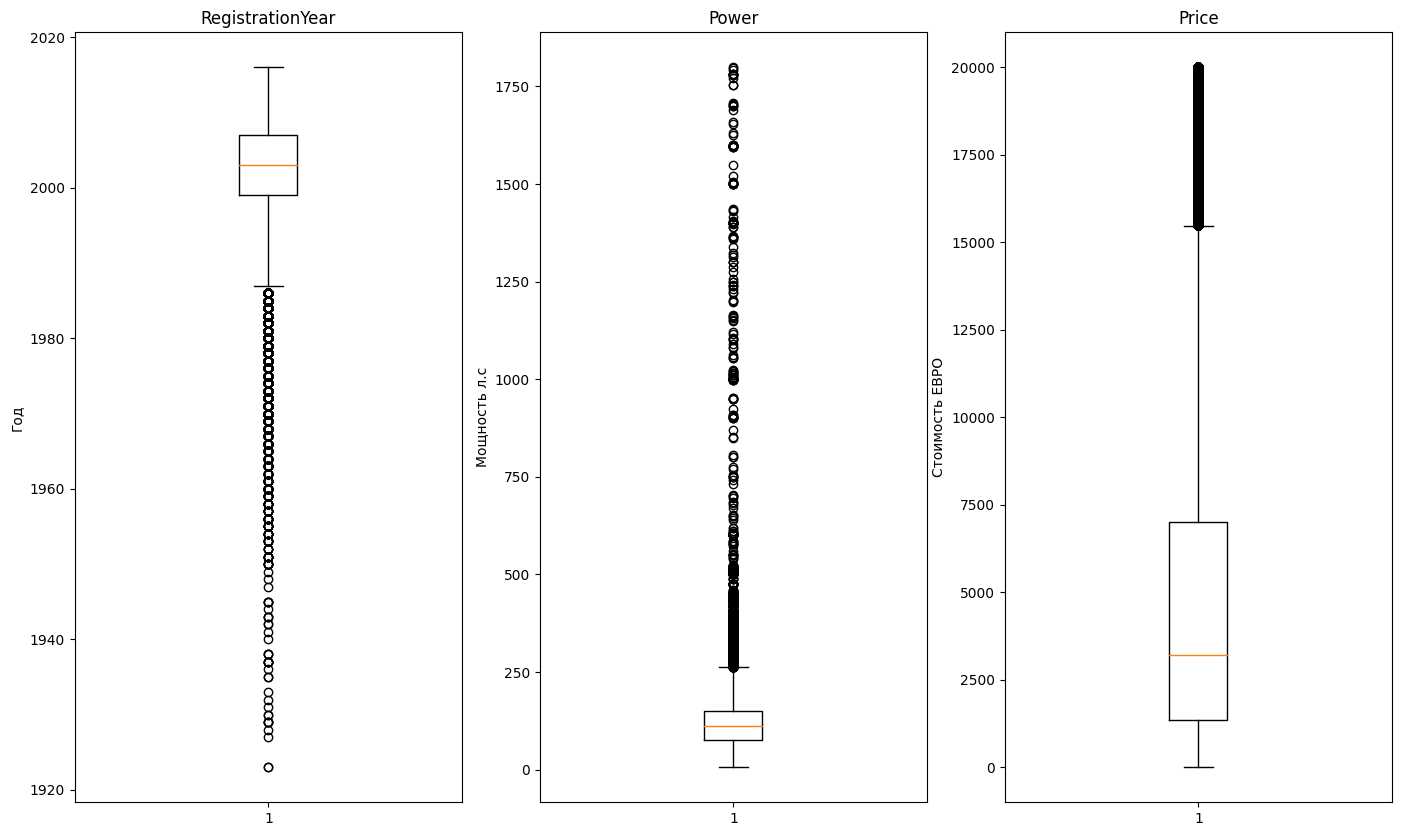

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(17, 10))

axs[0].boxplot(df_clean['RegistrationYear'])
axs[0].set_title('RegistrationYear')
axs[0].set_ylabel('Год')
        
axs[1].boxplot(df_clean['Power'])
axs[1].set_title('Power')
axs[1].set_ylabel('Мощность л.с')

axs[2].boxplot(df_clean['Price'])
axs[2].set_title('Price')
axs[2].set_ylabel('Стоимость ЕВРО')

In [17]:
# Преобразуем на другой тип данных DateCrawled, DateCreated и LastSeen
df_clean['DateCrawled'] = pd.to_datetime(df_clean['DateCrawled'])
df_clean['DateCreated'] = pd.to_datetime(df_clean['DateCreated'])
df_clean['LastSeen'] = pd.to_datetime(df_clean['LastSeen'])

In [18]:
f'Потеряно {100 * (1 - df_clean.shape[0] / df.shape[0])}%'

'Потеряно 16.489026974707155%'

#### Пропущенные значения

Устранили аномальные значения, теперь смотрим кол-во пропущенных значений. 

Будем устранять аномальные значения заполнением `"unknown"` или медиальным значением, т.к. радикальным методом не получится, т.к. будет большая потеря данных, что и приведет к `invalid` данным, т.к. данные должны сохранять 70% от исходного после переработки, смотрим.

In [19]:
df_clean.isna().sum()

DateCrawled              0
Price                    0
VehicleType          10926
RegistrationYear         0
Gearbox               5336
Power                    0
Model                11014
Kilometer                0
RegistrationMonth        0
FuelType             15455
Brand                    0
Repaired             42742
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [20]:
len(df_clean)

295937

##### Радикальный метод

In [21]:
# Скорпируем
df_clean_rad = df_clean.copy()

In [22]:
# Устраняем
df_clean_rad = df_clean_rad[~df_clean_rad['VehicleType'].isna()]
df_clean_rad = df_clean_rad[~df_clean_rad['Gearbox'].isna()]
df_clean_rad = df_clean_rad[~df_clean_rad['Model'].isna()]
df_clean_rad = df_clean_rad[~df_clean_rad['FuelType'].isna()]
df_clean_rad = df_clean_rad[~df_clean_rad['Repaired'].isna()]

In [23]:
f'Потеряно {100 * (1 - df_clean_rad.shape[0] / df_clean.shape[0])}%'

'Потеряно 21.300817403704166%'

Потеря составляет 21% от датафрейма df_clean, но не стоит забывать, что датафрейм также претерпевал потерю около 17% от исходного датафрейма, значит, потеря составляет свыше 30%. А нам хотя бы сохранить не менее 70% от исходных данных

##### Второй способ - заполнение `"unknown"` или медианным значением 

In [24]:
# Заполним значением "unknown"
df_clean['VehicleType'] = df_clean['VehicleType'].fillna('unknown')
df_clean['Gearbox'] = df_clean['Gearbox'].fillna('unknown')
df_clean['Model'] = df_clean['Model'].fillna('unknown')
df_clean['FuelType'] = df_clean['FuelType'].fillna('unknown')
df_clean['Repaired'] = df_clean['Repaired'].fillna('unknown')

In [25]:
# Проверим
df_clean.isna().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

In [26]:
df_clean.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04,0,33775,2016-04-06 19:17:07


In [27]:
len(df_clean)

295937

#### Уникальные значения 

С столбцом `RegistrationMonth` что то неладное, смотрим

In [28]:
df_clean['RegistrationMonth'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Как оказывается, что существует одна лишняя цифра

In [29]:
df_clean['RegistrationMonth'].value_counts().sort_values()

0     17814
2     18856
8     19722
1     20187
9     20953
11    21050
12    21206
10    22962
7     23837
5     25619
4     25753
6     27556
3     30422
Name: RegistrationMonth, dtype: int64

Смотрим кол-во, чтобы понять, что с ними делать - удалить или усреднять

In [30]:
df_clean[df_clean['RegistrationMonth'] == 0]['RegistrationMonth'].count()

17814

In [31]:
df_clean[df_clean['RegistrationMonth'] == 12]['RegistrationMonth'].count()

21206

Кол-во приближенное одинаково, поэтому не можем устранять их, усредняем

In [32]:
df_clean.loc[df_clean['RegistrationMonth'] == 12]['RegistrationMonth'] = 6

C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2917873319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[df_clean['RegistrationMonth'] == 12]['RegistrationMonth'] = 6


In [33]:
df_clean['RegistrationMonth'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Теперь с данными в порядке, можно уже приступать к обучению моделей

#### Дублирующие значения

In [34]:
# Кол-во дублириющие значения
df_clean.duplicated().sum()

4

In [35]:
# Избавимся от них
df_clean.drop_duplicates(inplace=True)

In [36]:
# Кол-во дублириющие значения
df_clean.duplicated().sum()

0

In [37]:
f'Потеряно {100 * (1 - df_clean.shape[0] / df.shape[0])}%'

'Потеряно 16.490155741613965%'

Теперь приступаем к обучению модели

## Обучение моделей

Перед обучением нужно сделать следующие: прямое кодирование, порядкое кодирование и масштабируемость модели. Поэтому обучение моделей будет разделен на 3 этапа: OH, OHE, SCALER. А также обучение будет проводиться кроссвалидацией

Поскольку у нас присутствуют некоторые признаки, которые являются строковыми или ojbect типами, а для машинного обучения регрессионного типа требует числа. Поэтому примением кодировку, которая будет преобразовать в числа

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295933 entries, 1 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        295933 non-null  datetime64[ns]
 1   Price              295933 non-null  int64         
 2   VehicleType        295933 non-null  object        
 3   RegistrationYear   295933 non-null  int64         
 4   Gearbox            295933 non-null  object        
 5   Power              295933 non-null  int64         
 6   Model              295933 non-null  object        
 7   Kilometer          295933 non-null  int64         
 8   RegistrationMonth  295933 non-null  int64         
 9   FuelType           295933 non-null  object        
 10  Brand              295933 non-null  object        
 11  Repaired           295933 non-null  object        
 12  DateCreated        295933 non-null  datetime64[ns]
 13  NumberOfPictures   295933 non-null  int64   

Как и видим, что существуют несколько признаков, имеющих типа object. Теперь создадим список, который автоматически заполняет определенный тип

In [39]:
# Здесь будем сохранить результаты машинного обучения
results = pd.DataFrame()

# А это будет счетчтиком для нумерация моеделй
count_model = 0

**Категориальные признаки**

In [40]:
col_type_obj = df_clean.select_dtypes(include='object').columns.to_list()
print('Список категориальных признаков:', col_type_obj)

Список категориальных признаков: ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']


**Численные признаки**

In [41]:
col_type_num = df_clean.select_dtypes(exclude='object').columns.to_list()
for i in ['DateCrawled', 'Price', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen']:
    col_type_num.remove(i)
print('Список численных признаков:', col_type_num)

Список численных признаков: ['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth']


### Прямое кодирование - One-Hot Encoding

_**Памятка себе:**_

**Модели основанные на деревьях (все модели в проекте кроме Линейной) могут работать с порядковым кодированием категорий (OrdinalEncoding).**

**OHE сильно раздувает размерность данных, что сказывается на вычислительной нагрузке (времени).**

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295933 entries, 1 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        295933 non-null  datetime64[ns]
 1   Price              295933 non-null  int64         
 2   VehicleType        295933 non-null  object        
 3   RegistrationYear   295933 non-null  int64         
 4   Gearbox            295933 non-null  object        
 5   Power              295933 non-null  int64         
 6   Model              295933 non-null  object        
 7   Kilometer          295933 non-null  int64         
 8   RegistrationMonth  295933 non-null  int64         
 9   FuelType           295933 non-null  object        
 10  Brand              295933 non-null  object        
 11  Repaired           295933 non-null  object        
 12  DateCreated        295933 non-null  datetime64[ns]
 13  NumberOfPictures   295933 non-null  int64   

In [43]:
# Убираем лишние признаки перед прямым кодированием
df_ohe = df_clean[['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 
                   'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'Repaired']]

In [44]:
# Смотирм
df_ohe.duplicated().sum()

23102

In [45]:
# Избавимся от них
df_ohe.drop_duplicates(inplace=True)

C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2381614365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ohe.drop_duplicates(inplace=True)


#### Деление на обучающей и валидационной выборки

In [46]:
# Получаем признак и цель 
features = df_ohe.drop('Price', axis=1)
target = df_ohe['Price']

In [47]:
# Разделим обучающую и валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=(1 - 0.6), random_state=12345)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Здорово , что у нас есть выборка для тестов!</font>

In [48]:
# Кодируем
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [49]:
# Обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[col_type_obj])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [50]:
# Добавляем закодированные признаки в X_train_ohe
# Encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])

C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame

C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame

C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame

In [51]:
# Энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])

D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2424170447.py:2: PerformanceWarning: DataFrame

In [52]:
# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(col_type_obj, axis=1)

features_valid = features_valid.drop(col_type_obj, axis=1)

In [53]:
display(features_train.head())
display(features_valid.head())

,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
184019,2007,131,125000,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
224508,1997,75,100000,9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328264,1997,130,150000,3,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136227,2009,143,60000,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309930,2006,170,150000,12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
110198,2001,44,150000,5,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96619,2007,105,150000,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
345457,2000,179,150000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142762,1997,231,150000,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221541,2008,71,50000,9,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### LinearRegression

In [54]:
# Устанавливаем нужные параметры
parameters = {}

# Инициализируем модель
model = GridSearchCV(LinearRegression(), param_grid = parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [55]:
%%notify -m "LinearRegression OHE"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

RMSE TRAIN: 2678.2658313392585
TIME TRAIN [s]: 3.71
CPU times: total: 21.5 s
Wall time: 19.9 s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [56]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

# Узнаем RMSE
result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 2693.317059048769
Предсказание: 4844.076333852994
CPU times: total: 125 ms
Wall time: 378 ms


In [57]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'LinearRegression_OHE', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': model.refit_time_, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': model.best_params_
})

results[count_model]
count_model+=1

### Порядковое кодирование - OrdinalEncoder

#### Кодирование признаков - деление на обучающей и валидационной выборки

Теперь преобразуем в другой тип, применяя OrdinalEncoder

In [58]:
# Убираем лишние признаки перед прямым кодированием
df_clean = df_clean[['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 
                   'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'Repaired']]

In [59]:
features = df_clean.drop(['Price'], axis=1)
target = df_clean['Price']

In [60]:
# Разделим обучающую и валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=(1 - 0.6), random_state=12345)

In [61]:
Encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [62]:
# Обучающие признаки обучим и трансформируем 
features_train[col_type_obj] = Encoder.fit_transform(features_train[col_type_obj])

In [63]:
# Валидациоaнные признаки только трансформируем
features_valid[col_type_obj] = Encoder.transform(features_valid[col_type_obj])

In [64]:
# Проверим
print(features_train.shape)
print(features_valid.shape)

(177559, 10)
(118374, 10)


In [65]:
print('Размер обучающей выборки:', round(features_train.shape[0] / features.shape[0], 2), '%')
print('Размер валидационной выборки:', round(features_valid.shape[0] / target.shape[0], 2), '%')

Размер обучающей выборки: 0.6 %
Размер валидационной выборки: 0.4 %


In [66]:
display(features_train.head(3))

display(features_valid.head(3))

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired
131749,5.0,1996,1.0,54,75.0,150000,5,7.0,27.0,0.0
279442,4.0,2000,1.0,75,116.0,125000,9,6.0,38.0,0.0
166435,8.0,2000,1.0,107,136.0,150000,9,6.0,27.0,0.0


,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired
193124,5.0,2002,1.0,60,102.0,90000,3,6.0,10.0,0.0
2170,8.0,2005,1.0,135,198.0,125000,5,6.0,27.0,0.0
235550,5.0,2009,1.0,60,101.0,150000,3,6.0,31.0,2.0


Теперь создадим датасет, в котором содержатся исключительно цифры

**Проверка на тестовой выборки**

#### DecisionTreeRegressor

In [67]:
# Матрица гиперпараметров
parameters = {'max_depth': range(1, 101, 10), 'min_samples_leaf': [1, 0.5, 2]}

# Инициализируем модель c параметрами
model = GridSearchCV(DecisionTreeRegressor(random_state = 12345), param_grid = parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [68]:
%%notify -m "DecisionTreeRegressor OE"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

RMSE TRAIN: 1946.6320820939814
TIME TRAIN [s]: 0.37
CPU times: total: 48.5 s
Wall time: 49.3 s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [69]:
# Инициализируем модель c лучшими гиперпараметрами
model = DecisionTreeRegressor(random_state = 12345).set_params(max_depth = params['max_depth'], min_samples_leaf = params['min_samples_leaf'])

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

DecisionTreeRegressor(max_depth=11, min_samples_leaf=2, random_state=12345)

In [70]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)

print('Предсказание:', predictions.mean())

RMSE VALID: 1911.4296286479232
Предсказание: 4855.465560115789
CPU times: total: 15.6 ms
Wall time: 25 ms


In [71]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'DecisionTreeRegressor_OE', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': round(time, 2), 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

#### RandomForestRegressor

In [72]:
# Матрица гиперпараметров для случайного леса
parameters = {'bootstrap': [True], 'max_depth': [5, 15], 'max_features': ['auto', 'log2'], 'n_estimators': [25, 50]}

# Инициализируем модель c параметрами
model = GridSearchCV(RandomForestRegressor(random_state = 12345), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [73]:
%%notify -m "RandomForestRegressor OE"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

RMSE TRAIN: 1635.4065969530275
TIME TRAIN [s]: 6.38
CPU times: total: 3min 20s
Wall time: 3min 25s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [74]:
# Инициализируем модель c лучшими гиперпараметрами
model = RandomForestRegressor(random_state = 12345).set_params(
    max_depth = params['max_depth'], 
    max_features = params['max_features'], 
    n_estimators = params['n_estimators']
)

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

RandomForestRegressor(max_depth=15, max_features='log2', n_estimators=50,
                      random_state=12345)

In [75]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 1606.6479762704178
Предсказание: 4854.598314764133
CPU times: total: 812 ms
Wall time: 906 ms


In [76]:
results[count_model] = pd.Series({
    'NAME': 'RandomForestRegressor_OE', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

#### LightGBMRegressor

In [77]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'num_leaves': [5, 10],
              'learning_rate': [0.1, 0.3],
              'max_depth': [3, 5],
              'n_estimators': [10, 25]}

# Инициализируем модель c параметрами
model = GridSearchCV(LGBMRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [78]:
%%notify -m "LightGBMRegressor OE"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

RMSE TRAIN: 1887.95083563258
TIME TRAIN [s]: 0.13
CPU times: total: 2min 15s
Wall time: 9.91 s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [79]:
# Инициализируем модель c лучшими гиперпараметрами
model = LGBMRegressor().set_params(
    max_depth = params['max_depth'], 
    num_leaves = params['num_leaves'], 
    learning_rate = params['learning_rate'],
    n_estimators = params['n_estimators']
)

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=25, num_leaves=10)

In [80]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 1858.723461074672
Предсказание: 4861.046970265422
CPU times: total: 422 ms
Wall time: 36 ms


In [81]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'LightGBMRegressor_OE_C', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

#### CatBoostRegressor

In [82]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'depth' : [6, 8, 10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations' : [10, 15, 20]}

# Инициализируем модель c параметрами
model = GridSearchCV(CatBoostRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [83]:
%%notify -m "CatBoostRegressor OE"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

0:	learn: 4595.6975750	total: 152ms	remaining: 1.36s
1:	learn: 4565.0904929	total: 161ms	remaining: 645ms
2:	learn: 4534.9589066	total: 170ms	remaining: 397ms
3:	learn: 4505.2428554	total: 180ms	remaining: 270ms
4:	learn: 4475.7557038	total: 190ms	remaining: 190ms
5:	learn: 4446.9740799	total: 198ms	remaining: 132ms
6:	learn: 4418.6968903	total: 208ms	remaining: 89.1ms
7:	learn: 4391.0918699	total: 217ms	remaining: 54.3ms
8:	learn: 4363.5150246	total: 227ms	remaining: 25.2ms
9:	learn: 4335.8113842	total: 236ms	remaining: 0us
0:	learn: 4587.1013079	total: 9.88ms	remaining: 89ms
1:	learn: 4556.5692240	total: 18.3ms	remaining: 73.2ms
2:	learn: 4526.8269200	total: 26.7ms	remaining: 62.2ms
3:	learn: 4496.9895735	total: 35.4ms	remaining: 53.1ms
4:	learn: 4467.5828003	total: 44.3ms	remaining: 44.3ms
5:	learn: 4439.0487143	total: 52.9ms	remaining: 35.3ms
6:	learn: 4410.6546440	total: 61.6ms	remaining: 26.4ms
7:	learn: 4383.0422919	total: 69.9ms	remaining: 17.5ms
8:	learn: 4355.8783718	total: 7

2:	learn: 4526.8269200	total: 28.1ms	remaining: 112ms
3:	learn: 4496.9895735	total: 37.1ms	remaining: 102ms
4:	learn: 4467.5828003	total: 46.5ms	remaining: 93ms
5:	learn: 4439.0487143	total: 56.3ms	remaining: 84.4ms
6:	learn: 4410.6546440	total: 64.6ms	remaining: 73.8ms
7:	learn: 4383.0422919	total: 72.8ms	remaining: 63.7ms
8:	learn: 4355.8783718	total: 80.9ms	remaining: 54ms
9:	learn: 4328.5430622	total: 89.3ms	remaining: 44.6ms
10:	learn: 4301.7043955	total: 97.1ms	remaining: 35.3ms
11:	learn: 4274.8930987	total: 105ms	remaining: 26.3ms
12:	learn: 4248.5994869	total: 113ms	remaining: 17.5ms
13:	learn: 4222.9759387	total: 122ms	remaining: 8.69ms
14:	learn: 4196.9059752	total: 130ms	remaining: 0us
0:	learn: 4597.5807386	total: 10.1ms	remaining: 141ms
1:	learn: 4566.9262922	total: 18.9ms	remaining: 123ms
2:	learn: 4537.0352976	total: 27.5ms	remaining: 110ms
3:	learn: 4507.2665811	total: 36.1ms	remaining: 99.2ms
4:	learn: 4477.7327902	total: 45.3ms	remaining: 90.7ms
5:	learn: 4448.856212

2:	learn: 3829.6063136	total: 28.1ms	remaining: 112ms
3:	learn: 3628.1639252	total: 37.1ms	remaining: 102ms
4:	learn: 3441.0110240	total: 46.1ms	remaining: 92.3ms
5:	learn: 3280.5839932	total: 54.6ms	remaining: 81.9ms
6:	learn: 3137.4282523	total: 63.5ms	remaining: 72.6ms
7:	learn: 3003.8519463	total: 72.1ms	remaining: 63.1ms
8:	learn: 2890.8697071	total: 80.2ms	remaining: 53.5ms
9:	learn: 2788.1803190	total: 88.3ms	remaining: 44.1ms
10:	learn: 2702.5982791	total: 96.4ms	remaining: 35.1ms
11:	learn: 2629.3268461	total: 104ms	remaining: 26.1ms
12:	learn: 2563.6207465	total: 112ms	remaining: 17.3ms
13:	learn: 2502.3193216	total: 121ms	remaining: 8.62ms
14:	learn: 2450.9680750	total: 129ms	remaining: 0us
0:	learn: 4321.0631421	total: 10.7ms	remaining: 150ms
1:	learn: 4054.0549656	total: 19.3ms	remaining: 125ms
2:	learn: 3819.8358243	total: 27.9ms	remaining: 112ms
3:	learn: 3611.1188894	total: 36.8ms	remaining: 101ms
4:	learn: 3430.3339827	total: 45.5ms	remaining: 91ms
5:	learn: 3268.43117

0:	learn: 4467.0669821	total: 10.5ms	remaining: 199ms
1:	learn: 4322.7889640	total: 19.9ms	remaining: 179ms
2:	learn: 4188.9567737	total: 28.5ms	remaining: 162ms
3:	learn: 4062.1638108	total: 37.1ms	remaining: 149ms
4:	learn: 3943.4179026	total: 45.6ms	remaining: 137ms
5:	learn: 3833.1957923	total: 54.4ms	remaining: 127ms
6:	learn: 3729.8856270	total: 63ms	remaining: 117ms
7:	learn: 3630.7186810	total: 71.5ms	remaining: 107ms
8:	learn: 3535.1161394	total: 80.3ms	remaining: 98.2ms
9:	learn: 3444.9377844	total: 88.7ms	remaining: 88.7ms
10:	learn: 3362.4122204	total: 97.2ms	remaining: 79.5ms
11:	learn: 3283.9561696	total: 105ms	remaining: 70.2ms
12:	learn: 3211.2737563	total: 114ms	remaining: 61.2ms
13:	learn: 3145.4890193	total: 122ms	remaining: 52.2ms
14:	learn: 3082.1262387	total: 130ms	remaining: 43.5ms
15:	learn: 3022.2644153	total: 138ms	remaining: 34.6ms
16:	learn: 2966.7410404	total: 147ms	remaining: 25.9ms
17:	learn: 2912.3821688	total: 155ms	remaining: 17.2ms
18:	learn: 2861.301

0:	learn: 4321.0008481	total: 9.86ms	remaining: 187ms
1:	learn: 4062.7198693	total: 18.2ms	remaining: 164ms
2:	learn: 3828.2455904	total: 26.6ms	remaining: 151ms
3:	learn: 3613.7895991	total: 35.2ms	remaining: 141ms
4:	learn: 3426.3627954	total: 44.7ms	remaining: 134ms
5:	learn: 3261.6642717	total: 53.4ms	remaining: 125ms
6:	learn: 3121.7534535	total: 61.5ms	remaining: 114ms
7:	learn: 3001.7868268	total: 70.6ms	remaining: 106ms
8:	learn: 2892.9273622	total: 79.4ms	remaining: 97ms
9:	learn: 2798.0922417	total: 88.2ms	remaining: 88.2ms
10:	learn: 2712.7662274	total: 96.6ms	remaining: 79ms
11:	learn: 2635.1928593	total: 106ms	remaining: 70.3ms
12:	learn: 2570.8069515	total: 114ms	remaining: 61.6ms
13:	learn: 2509.4229765	total: 123ms	remaining: 52.8ms
14:	learn: 2459.8519754	total: 134ms	remaining: 44.6ms
15:	learn: 2413.3457570	total: 142ms	remaining: 35.6ms
16:	learn: 2373.3160557	total: 151ms	remaining: 26.7ms
17:	learn: 2334.6835630	total: 160ms	remaining: 17.7ms
18:	learn: 2301.09106

6:	learn: 3047.9842126	total: 81.3ms	remaining: 34.9ms
7:	learn: 2911.7654209	total: 92.6ms	remaining: 23.2ms
8:	learn: 2798.5866422	total: 104ms	remaining: 11.6ms
9:	learn: 2696.1825645	total: 116ms	remaining: 0us
0:	learn: 4303.9643419	total: 19.9ms	remaining: 179ms
1:	learn: 4021.1011339	total: 30.8ms	remaining: 123ms
2:	learn: 3772.9747484	total: 42.4ms	remaining: 98.9ms
3:	learn: 3557.6904953	total: 53.6ms	remaining: 80.4ms
4:	learn: 3370.5521681	total: 66.2ms	remaining: 66.2ms
5:	learn: 3200.7023413	total: 77.6ms	remaining: 51.7ms
6:	learn: 3050.1964189	total: 88.4ms	remaining: 37.9ms
7:	learn: 2916.0218413	total: 99ms	remaining: 24.7ms
8:	learn: 2801.3552053	total: 111ms	remaining: 12.3ms
9:	learn: 2696.5273050	total: 123ms	remaining: 0us
0:	learn: 4593.8610044	total: 13.5ms	remaining: 189ms
1:	learn: 4561.7441058	total: 25.1ms	remaining: 163ms
2:	learn: 4530.5462092	total: 36.5ms	remaining: 146ms
3:	learn: 4499.6361735	total: 48ms	remaining: 132ms
4:	learn: 4468.9376964	total: 

0:	learn: 4306.8652252	total: 13.3ms	remaining: 186ms
1:	learn: 4026.4585616	total: 25.8ms	remaining: 168ms
2:	learn: 3779.5803336	total: 37.4ms	remaining: 150ms
3:	learn: 3559.4627803	total: 49.5ms	remaining: 136ms
4:	learn: 3369.1078138	total: 61.5ms	remaining: 123ms
5:	learn: 3194.4027442	total: 72.9ms	remaining: 109ms
6:	learn: 3041.5103002	total: 84.7ms	remaining: 96.8ms
7:	learn: 2912.2664786	total: 96ms	remaining: 84ms
8:	learn: 2799.7007241	total: 107ms	remaining: 71.6ms
9:	learn: 2700.5710982	total: 119ms	remaining: 59.4ms
10:	learn: 2609.0011429	total: 130ms	remaining: 47.3ms
11:	learn: 2530.3198922	total: 142ms	remaining: 35.4ms
12:	learn: 2464.4847626	total: 152ms	remaining: 23.4ms
13:	learn: 2405.8345228	total: 163ms	remaining: 11.6ms
14:	learn: 2349.6882437	total: 174ms	remaining: 0us
0:	learn: 4302.4050775	total: 14.2ms	remaining: 199ms
1:	learn: 4024.2806521	total: 26.3ms	remaining: 171ms
2:	learn: 3785.1823957	total: 37.5ms	remaining: 150ms
3:	learn: 3563.5476213	total

19:	learn: 4047.7018502	total: 228ms	remaining: 0us
0:	learn: 4587.1859055	total: 13.3ms	remaining: 252ms
1:	learn: 4555.0977181	total: 24.2ms	remaining: 217ms
2:	learn: 4523.7787327	total: 35.5ms	remaining: 201ms
3:	learn: 4493.3151929	total: 46.8ms	remaining: 187ms
4:	learn: 4462.8043907	total: 59.5ms	remaining: 179ms
5:	learn: 4432.6818089	total: 71.1ms	remaining: 166ms
6:	learn: 4402.4161410	total: 82.3ms	remaining: 153ms
7:	learn: 4373.2226379	total: 93.6ms	remaining: 140ms
8:	learn: 4343.7621226	total: 105ms	remaining: 128ms
9:	learn: 4314.4962980	total: 116ms	remaining: 116ms
10:	learn: 4285.7010022	total: 127ms	remaining: 104ms
11:	learn: 4257.4430537	total: 138ms	remaining: 91.9ms
12:	learn: 4229.8023145	total: 150ms	remaining: 80.7ms
13:	learn: 4202.1024222	total: 162ms	remaining: 69.4ms
14:	learn: 4174.8722931	total: 173ms	remaining: 57.8ms
15:	learn: 4148.3671708	total: 184ms	remaining: 46ms
16:	learn: 4122.0002380	total: 196ms	remaining: 34.5ms
17:	learn: 4095.3778123	tota

12:	learn: 2460.5336712	total: 146ms	remaining: 78.5ms
13:	learn: 2400.0546625	total: 157ms	remaining: 67.3ms
14:	learn: 2344.5404879	total: 169ms	remaining: 56.4ms
15:	learn: 2297.7846058	total: 180ms	remaining: 45.1ms
16:	learn: 2257.7152643	total: 191ms	remaining: 33.6ms
17:	learn: 2222.5343474	total: 201ms	remaining: 22.3ms
18:	learn: 2188.4905137	total: 211ms	remaining: 11.1ms
19:	learn: 2159.0219060	total: 222ms	remaining: 0us
0:	learn: 4314.0432876	total: 13.1ms	remaining: 250ms
1:	learn: 4034.8034889	total: 24.5ms	remaining: 221ms
2:	learn: 3788.2500357	total: 35.8ms	remaining: 203ms
3:	learn: 3573.6166217	total: 47.1ms	remaining: 188ms
4:	learn: 3379.7742359	total: 58.1ms	remaining: 174ms
5:	learn: 3210.0820458	total: 69.8ms	remaining: 163ms
6:	learn: 3052.5537358	total: 82.1ms	remaining: 152ms
7:	learn: 2913.4909344	total: 93ms	remaining: 140ms
8:	learn: 2801.1511537	total: 104ms	remaining: 127ms
9:	learn: 2697.3147261	total: 115ms	remaining: 115ms
10:	learn: 2608.6477390	tot

5:	learn: 3760.7980595	total: 136ms	remaining: 90.9ms
6:	learn: 3644.2465625	total: 159ms	remaining: 68.2ms
7:	learn: 3535.0977014	total: 181ms	remaining: 45.3ms
8:	learn: 3432.0432964	total: 204ms	remaining: 22.7ms
9:	learn: 3335.2602075	total: 226ms	remaining: 0us
0:	learn: 4454.5786610	total: 24.6ms	remaining: 222ms
1:	learn: 4300.3613487	total: 47.6ms	remaining: 190ms
2:	learn: 4151.6931092	total: 69.8ms	remaining: 163ms
3:	learn: 4012.4953641	total: 91ms	remaining: 137ms
4:	learn: 3881.5304280	total: 113ms	remaining: 113ms
5:	learn: 3759.3952993	total: 135ms	remaining: 90.3ms
6:	learn: 3645.4668957	total: 157ms	remaining: 67.4ms
7:	learn: 3535.9410464	total: 179ms	remaining: 44.8ms
8:	learn: 3432.1930648	total: 201ms	remaining: 22.3ms
9:	learn: 3336.8770746	total: 224ms	remaining: 0us
0:	learn: 4295.2808498	total: 22.8ms	remaining: 205ms
1:	learn: 4000.3753108	total: 46.1ms	remaining: 184ms
2:	learn: 3743.7437281	total: 69.6ms	remaining: 162ms
3:	learn: 3514.2763504	total: 91.3ms	

14:	learn: 2936.6781445	total: 332ms	remaining: 0us
0:	learn: 4452.1083263	total: 24.3ms	remaining: 340ms
1:	learn: 4294.9352356	total: 47ms	remaining: 306ms
2:	learn: 4148.6808212	total: 69ms	remaining: 276ms
3:	learn: 4009.0698782	total: 90.4ms	remaining: 249ms
4:	learn: 3879.3191715	total: 112ms	remaining: 224ms
5:	learn: 3759.5793378	total: 133ms	remaining: 200ms
6:	learn: 3643.3645215	total: 156ms	remaining: 178ms
7:	learn: 3532.9844009	total: 178ms	remaining: 156ms
8:	learn: 3430.0610191	total: 202ms	remaining: 134ms
9:	learn: 3332.5029579	total: 223ms	remaining: 112ms
10:	learn: 3240.5895501	total: 245ms	remaining: 89ms
11:	learn: 3155.4974475	total: 267ms	remaining: 66.7ms
12:	learn: 3075.1709229	total: 289ms	remaining: 44.5ms
13:	learn: 2999.2949444	total: 312ms	remaining: 22.3ms
14:	learn: 2928.3963049	total: 335ms	remaining: 0us
0:	learn: 4463.7379408	total: 25.6ms	remaining: 358ms
1:	learn: 4304.3257162	total: 48.2ms	remaining: 313ms
2:	learn: 4158.7783184	total: 70.4ms	rem

1:	learn: 4550.7276915	total: 46.5ms	remaining: 419ms
2:	learn: 4518.4090743	total: 69ms	remaining: 391ms
3:	learn: 4486.1209528	total: 90.8ms	remaining: 363ms
4:	learn: 4454.0564579	total: 112ms	remaining: 337ms
5:	learn: 4423.3003671	total: 134ms	remaining: 313ms
6:	learn: 4392.1817988	total: 156ms	remaining: 290ms
7:	learn: 4361.2074341	total: 178ms	remaining: 267ms
8:	learn: 4331.3195529	total: 199ms	remaining: 243ms
9:	learn: 4301.0756397	total: 221ms	remaining: 221ms
10:	learn: 4271.2945846	total: 243ms	remaining: 199ms
11:	learn: 4242.0711441	total: 265ms	remaining: 176ms
12:	learn: 4213.4857295	total: 287ms	remaining: 154ms
13:	learn: 4184.9061783	total: 308ms	remaining: 132ms
14:	learn: 4156.7392322	total: 329ms	remaining: 110ms
15:	learn: 4128.8591128	total: 351ms	remaining: 87.7ms
16:	learn: 4101.5647434	total: 372ms	remaining: 65.7ms
17:	learn: 4074.1432716	total: 394ms	remaining: 43.8ms
18:	learn: 4047.0340051	total: 415ms	remaining: 21.9ms
19:	learn: 4020.4465380	total: 4

16:	learn: 2804.4154913	total: 377ms	remaining: 66.4ms
17:	learn: 2746.3308931	total: 401ms	remaining: 44.6ms
18:	learn: 2691.2755166	total: 423ms	remaining: 22.3ms
19:	learn: 2640.1363039	total: 445ms	remaining: 0us
0:	learn: 4454.5786610	total: 24.8ms	remaining: 472ms
1:	learn: 4300.3613487	total: 50.2ms	remaining: 452ms
2:	learn: 4151.6931092	total: 74ms	remaining: 419ms
3:	learn: 4012.4953641	total: 98.7ms	remaining: 395ms
4:	learn: 3881.5304280	total: 123ms	remaining: 368ms
5:	learn: 3759.3952993	total: 146ms	remaining: 342ms
6:	learn: 3645.4668957	total: 169ms	remaining: 314ms
7:	learn: 3535.9410464	total: 191ms	remaining: 287ms
8:	learn: 3432.1930648	total: 213ms	remaining: 260ms
9:	learn: 3336.8770746	total: 233ms	remaining: 233ms
10:	learn: 3245.3345284	total: 255ms	remaining: 209ms
11:	learn: 3160.0157616	total: 278ms	remaining: 185ms
12:	learn: 3079.8600990	total: 299ms	remaining: 161ms
13:	learn: 3005.8347263	total: 322ms	remaining: 138ms
14:	learn: 2935.2292176	total: 344m

<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [84]:
# Инициализируем модель c лучшими гиперпараметрами
model = CatBoostRegressor().set_params(
    depth = params['depth'], 
    learning_rate = params['learning_rate'], 
    iterations = params['iterations']
)

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

0:	learn: 4292.6884486	total: 28.6ms	remaining: 544ms
1:	learn: 3998.4492194	total: 55.3ms	remaining: 498ms
2:	learn: 3743.1994915	total: 82.7ms	remaining: 469ms
3:	learn: 3514.3690218	total: 110ms	remaining: 439ms
4:	learn: 3310.7681710	total: 140ms	remaining: 420ms
5:	learn: 3134.7327419	total: 170ms	remaining: 397ms
6:	learn: 2976.6019672	total: 200ms	remaining: 371ms
7:	learn: 2841.7769690	total: 229ms	remaining: 344ms
8:	learn: 2723.1084031	total: 258ms	remaining: 315ms
9:	learn: 2621.5374083	total: 284ms	remaining: 284ms
10:	learn: 2527.2522847	total: 313ms	remaining: 256ms
11:	learn: 2446.0472900	total: 339ms	remaining: 226ms
12:	learn: 2379.0186817	total: 365ms	remaining: 197ms
13:	learn: 2314.4885843	total: 391ms	remaining: 168ms
14:	learn: 2259.8224623	total: 417ms	remaining: 139ms
15:	learn: 2214.3353087	total: 442ms	remaining: 110ms
16:	learn: 2171.7500251	total: 468ms	remaining: 82.5ms
17:	learn: 2135.1566625	total: 495ms	remaining: 55ms
18:	learn: 2100.0875746	total: 520m

In [85]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 2058.2621331876317
Предсказание: 4856.60198898797
CPU times: total: 0 ns
Wall time: 15 ms


In [86]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'CatBoostRegressor_OE', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

### Масштабирование признаков - StandardScaler

#### Масштабируем One-Hot Encoding

##### Деление на обучающей и валидационной выборки

In [87]:
features = df_ohe.drop(['Price'], axis=1)
target = df_ohe['Price']

In [88]:
# Разделим обучающую и валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=(1 - 0.6), random_state=12345)

In [89]:
# Кодируем
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

<font color='purple'><b>Комментарий студента</b> Подправил </font>

In [90]:
# Обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[col_type_obj])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [91]:
# Добавляем закодированные признаки в X_train_ohe
# Encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])

C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame

C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame

C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2474216900.py:3: PerformanceWarning: DataFrame

In [92]:
# Энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])

D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\2424170447.py:2: PerformanceWarning: DataFrame

In [93]:
# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(col_type_obj, axis=1)

features_valid = features_valid.drop(col_type_obj, axis=1)

In [94]:
display(features_train.head())
display(features_valid.head())

,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
184019,2007,131,125000,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
224508,1997,75,100000,9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328264,1997,130,150000,3,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136227,2009,143,60000,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309930,2006,170,150000,12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
110198,2001,44,150000,5,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96619,2007,105,150000,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
345457,2000,179,150000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142762,1997,231,150000,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221541,2008,71,50000,9,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# Масштабируем признаки: обучающую и валидационную выборку
scaler = StandardScaler()

In [96]:
# Преобразуем обучающую, валидационную и тестовую выборки функцией transform(), т.е.
# обучаем его на численных признаках тренировочной выборки, трансформируем её же
features_train[col_type_num] = scaler.fit_transform(features_train[col_type_num])
features_valid[col_type_num] = scaler.fit_transform(features_valid[col_type_num])

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Отлично, что scaler был обучен только на тренировочной части данных!</font>

In [97]:
# Проверим
print(features_train.shape)
print(features_valid.shape)

(163698, 310)
(109133, 310)


In [98]:
print('Размер обучающей выборки:', round(features_train.shape[0] / features.shape[0], 2), '%')
print('Размер валидационной выборки:', round(features_valid.shape[0] / target.shape[0], 2), '%')

Размер обучающей выборки: 0.6 %
Размер валидационной выборки: 0.4 %


In [99]:
display(features_train.head())

display(features_valid.head())

,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
184019,0.639959,0.160845,-0.090133,0.005881,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
224508,-0.882114,-0.762130,-0.770483,0.840874,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328264,-0.882114,0.144363,0.590217,-0.829112,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136227,0.944374,0.358625,-1.859043,-0.829112,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309930,0.487752,0.803631,0.590217,1.675868,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
110198,-0.265106,-1.244210,0.591269,-0.269498,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96619,0.639549,-0.261018,0.591269,-0.827991,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
345457,-0.415881,0.931706,0.591269,-1.665730,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142762,-0.868209,1.769837,0.591269,-0.827991,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221541,0.790325,-0.809027,-2.121061,0.847488,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### LinearRegression

In [100]:
# Устанавливаем нужные параметры
parameters = {}

# Инициализируем модель
model = GridSearchCV(LinearRegression(), param_grid = parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [101]:
%%notify -m "LinearRegression OHE C"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

RMSE TRAIN: 2678.2658313390552
TIME TRAIN [s]: 3.88
CPU times: total: 26.5 s
Wall time: 20.6 s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [102]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 2692.6928922932516
Предсказание: 4850.247989100264
CPU times: total: 0 ns
Wall time: 246 ms


In [103]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'LinearRegression_OHE_C', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

#### Масштабируем OrdinalEncoder

##### Деление на обучающей и валидационной выборки

In [104]:
features = df_clean.drop(['Price'], axis=1)
target = df_clean['Price']

In [105]:
# Разделим обучающую и валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=(1 - 0.6), random_state=12345)

##### Кодируем признаки

In [106]:
# Обучающие признаки
features_train = pd.DataFrame(Encoder.fit_transform(features_train[col_type_obj]), columns=col_type_obj)

In [107]:
# Валидациоaнные признаки только трансформируем
features_valid = pd.DataFrame(Encoder.transform(features_valid[col_type_obj]), columns=col_type_obj)

In [108]:
# Масштабируем признаки: обучающую и валидационную выборку
scaler.fit(features_train[col_type_obj])

# Преобразуем обучающую, валидационную и тестовую выборки функцией transform()
features_train[col_type_obj] = scaler.transform(features_train[col_type_obj])
features_valid[col_type_obj] = scaler.transform(features_valid[col_type_obj])

In [109]:
# Проверим
print(features_train.shape)
print(features_valid.shape)

(177559, 6)
(118374, 6)


In [110]:
print('Размер обучающей выборки:', round(features_train.shape[0] / features.shape[0], 2), '%')
print('Размер валидационной выборки:', round(features_valid.shape[0] / target.shape[0], 2), '%')

Размер обучающей выборки: 0.6 %
Размер валидационной выборки: 0.4 %


In [111]:
display(features_train.head(3))

display(features_train.head(3))

,VehicleType,Gearbox,Model,FuelType,Brand,Repaired
0,0.178426,0.422522,-0.513284,1.157953,0.468488,-0.523308
1,-0.237768,0.422522,0.049325,0.626473,1.291481,-0.523308
2,1.427006,0.422522,0.323768,0.626473,0.468488,-0.523308


,VehicleType,Gearbox,Model,FuelType,Brand,Repaired
0,0.178426,0.422522,-0.513284,1.157953,0.468488,-0.523308
1,-0.237768,0.422522,0.049325,0.626473,1.291481,-0.523308
2,1.427006,0.422522,0.323768,0.626473,0.468488,-0.523308


##### DecisionTreeRegressor

In [112]:
# Матрица гиперпараметров
parameters = {'max_depth': range(1, 101, 10), 'min_samples_leaf': [1, 0.5, 2]}

# Инициализируем модель c параметрами
model = GridSearchCV(DecisionTreeRegressor(random_state = 12345), param_grid = parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [113]:
%%notify -m "DecisionTreeRegressor OE C"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

RMSE TRAIN: 3499.0934747671336
TIME TRAIN [s]: 0.16
CPU times: total: 14.1 s
Wall time: 14.3 s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [114]:
# Инициализируем модель c лучшими гиперпараметрами
model = DecisionTreeRegressor(random_state = 12345).set_params(max_depth = params['max_depth'], min_samples_leaf = params['min_samples_leaf'])

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

DecisionTreeRegressor(max_depth=21, min_samples_leaf=2, random_state=12345)

In [115]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)

print('Предсказание:', predictions.mean())

RMSE VALID: 3456.621835386765
Предсказание: 4861.513936057213
CPU times: total: 0 ns
Wall time: 26 ms


In [116]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'DecisionTreeRegressor_OE_C', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

##### RandomForestRegressor

In [117]:
# Матрица гиперпараметров для случайного леса
parameters = {'bootstrap': [True], 'max_depth': [5, 15], 'max_features': ['auto', 'log2'], 'n_estimators': [25, 50]}

# Инициализируем модель c параметрами
model = GridSearchCV(RandomForestRegressor(random_state = 12345), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [118]:
%%notify -m "RandomForestRegressor OE C"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

RMSE TRAIN: 3481.2866744037797
TIME TRAIN [s]: 6.14
CPU times: total: 1min 32s
Wall time: 1min 34s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [119]:
# Инициализируем модель c лучшими гиперпараметрами
model = RandomForestRegressor(random_state = 12345).set_params(
    max_depth = params['max_depth'], 
    max_features = params['max_features'], 
    n_estimators = params['n_estimators']
)

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=15, max_features='auto', n_estimators=50,
                      random_state=12345)

In [120]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 3442.689669205216
Предсказание: 4863.122615073646
CPU times: total: 641 ms
Wall time: 757 ms


In [121]:
results[count_model] = pd.Series({
    'NAME': 'RandomForestRegressor_OE_C', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

##### LightGBMRegressor

In [122]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'num_leaves': [5, 10],
              'learning_rate': [0.1, 0.3],
              'max_depth': [3, 5],
              'n_estimators': [10, 25]}

# Инициализируем модель c параметрами
model = GridSearchCV(LGBMRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [123]:
%%notify -m "LightGBMRegressor OE C"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

RMSE TRAIN: 3716.0189293083263
TIME TRAIN [s]: 0.13
CPU times: total: 1min 51s
Wall time: 7.91 s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [124]:
# Инициализируем модель c лучшими гиперпараметрами
model = LGBMRegressor().set_params(
    max_depth = params['max_depth'], 
    num_leaves = params['num_leaves'], 
    learning_rate = params['learning_rate'],
    n_estimators = params['n_estimators']
)

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=25, num_leaves=10)

In [125]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 3689.2139083979214
Предсказание: 4874.343228946626
CPU times: total: 281 ms
Wall time: 26.5 ms


In [126]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'LightGBMRegressor_OE_C', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

##### CatBoostRegressor

In [127]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'depth' : [6, 8, 10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations' : [10, 15, 20]}

# Инициализируем модель c параметрами
model = GridSearchCV(CatBoostRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [128]:
%%notify -m "CatBoostRegressor OHE C"
%%time

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

0:	learn: 4614.9702257	total: 10.4ms	remaining: 93.4ms
1:	learn: 4603.9181521	total: 19.8ms	remaining: 79.1ms
2:	learn: 4592.9956013	total: 28.8ms	remaining: 67.3ms
3:	learn: 4582.2639861	total: 37.3ms	remaining: 56ms
4:	learn: 4571.7627772	total: 45.8ms	remaining: 45.8ms
5:	learn: 4561.4881886	total: 54.9ms	remaining: 36.6ms
6:	learn: 4551.3920948	total: 64.2ms	remaining: 27.5ms
7:	learn: 4541.3837436	total: 72.2ms	remaining: 18.1ms
8:	learn: 4531.6809957	total: 81.1ms	remaining: 9.01ms
9:	learn: 4521.9277066	total: 89.8ms	remaining: 0us
0:	learn: 4606.1325331	total: 8.75ms	remaining: 78.8ms
1:	learn: 4595.0166923	total: 18.4ms	remaining: 73.4ms
2:	learn: 4584.1094943	total: 27.6ms	remaining: 64.4ms
3:	learn: 4573.4092189	total: 37.1ms	remaining: 55.7ms
4:	learn: 4562.9411944	total: 46.6ms	remaining: 46.6ms
5:	learn: 4552.7182571	total: 55.5ms	remaining: 37ms
6:	learn: 4542.6476872	total: 64.5ms	remaining: 27.7ms
7:	learn: 4532.6652104	total: 74.3ms	remaining: 18.6ms
8:	learn: 4522.98

8:	learn: 4531.6809957	total: 74.9ms	remaining: 49.9ms
9:	learn: 4521.9277066	total: 83.5ms	remaining: 41.8ms
10:	learn: 4512.4207956	total: 92.3ms	remaining: 33.6ms
11:	learn: 4503.2428379	total: 102ms	remaining: 25.4ms
12:	learn: 4494.1860730	total: 110ms	remaining: 16.9ms
13:	learn: 4485.1796629	total: 118ms	remaining: 8.42ms
14:	learn: 4476.3092831	total: 126ms	remaining: 0us
0:	learn: 4606.1325331	total: 9.43ms	remaining: 132ms
1:	learn: 4595.0166923	total: 18ms	remaining: 117ms
2:	learn: 4584.1094943	total: 26.6ms	remaining: 106ms
3:	learn: 4573.4092189	total: 34.2ms	remaining: 94ms
4:	learn: 4562.9411944	total: 42.4ms	remaining: 84.9ms
5:	learn: 4552.7182571	total: 50.3ms	remaining: 75.5ms
6:	learn: 4542.6476872	total: 58.4ms	remaining: 66.8ms
7:	learn: 4532.6652104	total: 65.8ms	remaining: 57.6ms
8:	learn: 4522.9885759	total: 74ms	remaining: 49.3ms
9:	learn: 4513.2683897	total: 81.7ms	remaining: 40.9ms
10:	learn: 4503.8028749	total: 89.5ms	remaining: 32.6ms
11:	learn: 4494.6380

6:	learn: 4152.3066749	total: 58.9ms	remaining: 67.3ms
7:	learn: 4119.9635433	total: 67.7ms	remaining: 59.2ms
8:	learn: 4095.1627725	total: 75.8ms	remaining: 50.5ms
9:	learn: 4064.0626552	total: 84.8ms	remaining: 42.4ms
10:	learn: 4045.7667873	total: 93.2ms	remaining: 33.9ms
11:	learn: 4030.5156198	total: 101ms	remaining: 25.4ms
12:	learn: 4014.3341976	total: 110ms	remaining: 16.9ms
13:	learn: 3999.5969351	total: 118ms	remaining: 8.45ms
14:	learn: 3980.1798188	total: 127ms	remaining: 0us
0:	learn: 4519.7264643	total: 9.08ms	remaining: 127ms
1:	learn: 4429.7087225	total: 17.3ms	remaining: 112ms
2:	learn: 4354.1609120	total: 25.8ms	remaining: 103ms
3:	learn: 4291.6078067	total: 34.6ms	remaining: 95.2ms
4:	learn: 4241.1073938	total: 42.9ms	remaining: 85.7ms
5:	learn: 4198.8653020	total: 51ms	remaining: 76.5ms
6:	learn: 4163.8257978	total: 58.9ms	remaining: 67.3ms
7:	learn: 4131.3760559	total: 67.5ms	remaining: 59.1ms
8:	learn: 4105.2711726	total: 75.7ms	remaining: 50.5ms
9:	learn: 4073.67

0:	learn: 4570.6341150	total: 9.04ms	remaining: 172ms
1:	learn: 4519.9527683	total: 17.5ms	remaining: 158ms
2:	learn: 4473.1986005	total: 25.9ms	remaining: 147ms
3:	learn: 4430.4296288	total: 34.5ms	remaining: 138ms
4:	learn: 4391.7814816	total: 43.1ms	remaining: 129ms
5:	learn: 4356.5860792	total: 51.5ms	remaining: 120ms
6:	learn: 4324.4756461	total: 59.1ms	remaining: 110ms
7:	learn: 4295.1692439	total: 67.2ms	remaining: 101ms
8:	learn: 4268.6338529	total: 75.3ms	remaining: 92ms
9:	learn: 4243.6480376	total: 82.9ms	remaining: 82.9ms
10:	learn: 4221.1848121	total: 91ms	remaining: 74.5ms
11:	learn: 4200.8734512	total: 99ms	remaining: 66ms
12:	learn: 4181.6727934	total: 107ms	remaining: 57.7ms
13:	learn: 4163.7146684	total: 116ms	remaining: 49.8ms
14:	learn: 4147.7748044	total: 125ms	remaining: 41.6ms
15:	learn: 4133.0168443	total: 133ms	remaining: 33.3ms
16:	learn: 4115.3985085	total: 142ms	remaining: 25.1ms
17:	learn: 4102.9207312	total: 150ms	remaining: 16.7ms
18:	learn: 4091.5345577	

0:	learn: 4515.8465441	total: 8.65ms	remaining: 164ms
1:	learn: 4425.5376851	total: 17.4ms	remaining: 157ms
2:	learn: 4350.4376436	total: 27.3ms	remaining: 155ms
3:	learn: 4288.7159466	total: 36.3ms	remaining: 145ms
4:	learn: 4238.8587822	total: 44.7ms	remaining: 134ms
5:	learn: 4196.8026053	total: 52.6ms	remaining: 123ms
6:	learn: 4161.4192928	total: 61.3ms	remaining: 114ms
7:	learn: 4128.9610245	total: 70.5ms	remaining: 106ms
8:	learn: 4104.3475350	total: 78.7ms	remaining: 96.2ms
9:	learn: 4073.3849216	total: 86.9ms	remaining: 86.9ms
10:	learn: 4055.3532696	total: 94.8ms	remaining: 77.6ms
11:	learn: 4038.6363955	total: 103ms	remaining: 68.4ms
12:	learn: 4022.3071081	total: 111ms	remaining: 59.7ms
13:	learn: 4007.4581023	total: 120ms	remaining: 51.2ms
14:	learn: 3988.0133171	total: 128ms	remaining: 42.8ms
15:	learn: 3978.4528488	total: 137ms	remaining: 34.2ms
16:	learn: 3965.9978183	total: 146ms	remaining: 25.8ms
17:	learn: 3954.5141591	total: 155ms	remaining: 17.2ms
18:	learn: 3946.2

4:	learn: 4202.2621613	total: 58.4ms	remaining: 58.4ms
5:	learn: 4154.9964002	total: 70.5ms	remaining: 47ms
6:	learn: 4116.6253029	total: 81.7ms	remaining: 35ms
7:	learn: 4075.4565122	total: 93.1ms	remaining: 23.3ms
8:	learn: 4048.3321599	total: 104ms	remaining: 11.6ms
9:	learn: 4024.0398489	total: 115ms	remaining: 0us
0:	learn: 4513.7534495	total: 12ms	remaining: 108ms
1:	learn: 4416.8382833	total: 22.8ms	remaining: 91ms
2:	learn: 4337.0433791	total: 34.5ms	remaining: 80.5ms
3:	learn: 4271.4545258	total: 45.8ms	remaining: 68.7ms
4:	learn: 4214.2304405	total: 56.5ms	remaining: 56.5ms
5:	learn: 4166.8484479	total: 68.1ms	remaining: 45.4ms
6:	learn: 4128.4101376	total: 79.1ms	remaining: 33.9ms
7:	learn: 4087.3989332	total: 89.8ms	remaining: 22.5ms
8:	learn: 4059.5799820	total: 102ms	remaining: 11.3ms
9:	learn: 4034.4195441	total: 113ms	remaining: 0us
0:	learn: 4510.5526783	total: 12.1ms	remaining: 109ms
1:	learn: 4414.2526237	total: 22.2ms	remaining: 88.9ms
2:	learn: 4333.4369795	total: 

0:	learn: 4566.0926481	total: 12.8ms	remaining: 180ms
1:	learn: 4512.4658385	total: 24.7ms	remaining: 160ms
2:	learn: 4463.0659311	total: 37.2ms	remaining: 149ms
3:	learn: 4415.1708945	total: 48.1ms	remaining: 132ms
4:	learn: 4373.2717431	total: 58.9ms	remaining: 118ms
5:	learn: 4335.8592984	total: 69.5ms	remaining: 104ms
6:	learn: 4300.9914010	total: 81ms	remaining: 92.6ms
7:	learn: 4269.2090834	total: 91.5ms	remaining: 80.1ms
8:	learn: 4241.0448998	total: 103ms	remaining: 68.5ms
9:	learn: 4215.1669721	total: 113ms	remaining: 56.6ms
10:	learn: 4191.8531338	total: 124ms	remaining: 44.9ms
11:	learn: 4169.1151282	total: 134ms	remaining: 33.6ms
12:	learn: 4147.1089056	total: 145ms	remaining: 22.2ms
13:	learn: 4125.7638097	total: 156ms	remaining: 11.1ms
14:	learn: 4107.9223415	total: 166ms	remaining: 0us
0:	learn: 4561.0283361	total: 11.8ms	remaining: 165ms
1:	learn: 4507.0027872	total: 23.6ms	remaining: 154ms
2:	learn: 4458.3813327	total: 34.9ms	remaining: 140ms
3:	learn: 4414.0412016	tot

0:	learn: 4612.1597457	total: 17ms	remaining: 324ms
1:	learn: 4600.4858502	total: 28ms	remaining: 252ms
2:	learn: 4589.1584858	total: 39.4ms	remaining: 223ms
3:	learn: 4578.0727004	total: 50.6ms	remaining: 202ms
4:	learn: 4566.8895558	total: 61.3ms	remaining: 184ms
5:	learn: 4556.0458911	total: 72.2ms	remaining: 168ms
6:	learn: 4545.4303625	total: 83ms	remaining: 154ms
7:	learn: 4534.7858288	total: 93.7ms	remaining: 141ms
8:	learn: 4524.5879806	total: 104ms	remaining: 128ms
9:	learn: 4514.7114128	total: 115ms	remaining: 115ms
10:	learn: 4505.5729276	total: 122ms	remaining: 100ms
11:	learn: 4495.8328063	total: 133ms	remaining: 88.7ms
12:	learn: 4486.0641381	total: 143ms	remaining: 77.2ms
13:	learn: 4476.3884295	total: 154ms	remaining: 66.2ms
14:	learn: 4467.1022368	total: 165ms	remaining: 55.1ms
15:	learn: 4457.0972045	total: 176ms	remaining: 43.9ms
16:	learn: 4447.8734057	total: 187ms	remaining: 33ms
17:	learn: 4438.8774831	total: 198ms	remaining: 22ms
18:	learn: 4430.1176905	total: 20

18:	learn: 3874.0801067	total: 218ms	remaining: 11.5ms
19:	learn: 3860.8326416	total: 230ms	remaining: 0us
0:	learn: 4503.5945229	total: 12.1ms	remaining: 230ms
1:	learn: 4406.6057191	total: 23.2ms	remaining: 209ms
2:	learn: 4325.4170103	total: 35.2ms	remaining: 200ms
3:	learn: 4259.6060887	total: 46.5ms	remaining: 186ms
4:	learn: 4202.2621613	total: 57.7ms	remaining: 173ms
5:	learn: 4154.9964002	total: 68.5ms	remaining: 160ms
6:	learn: 4116.6253029	total: 79.6ms	remaining: 148ms
7:	learn: 4075.4565122	total: 91.1ms	remaining: 137ms
8:	learn: 4048.3321599	total: 102ms	remaining: 125ms
9:	learn: 4024.0398489	total: 114ms	remaining: 114ms
10:	learn: 3998.4928102	total: 126ms	remaining: 103ms
11:	learn: 3976.4356951	total: 139ms	remaining: 92.7ms
12:	learn: 3955.6992438	total: 150ms	remaining: 80.9ms
13:	learn: 3938.0792118	total: 162ms	remaining: 69.4ms
14:	learn: 3923.6604117	total: 174ms	remaining: 58.1ms
15:	learn: 3910.1838184	total: 186ms	remaining: 46.5ms
16:	learn: 3898.6071554	to

0:	learn: 4562.4550000	total: 21.7ms	remaining: 195ms
1:	learn: 4502.0197965	total: 42.1ms	remaining: 168ms
2:	learn: 4456.3842517	total: 51.4ms	remaining: 120ms
3:	learn: 4408.2955653	total: 71.5ms	remaining: 107ms
4:	learn: 4361.7292385	total: 91.8ms	remaining: 91.8ms
5:	learn: 4319.8329055	total: 114ms	remaining: 75.8ms
6:	learn: 4282.9781647	total: 135ms	remaining: 57.7ms
7:	learn: 4246.1758973	total: 155ms	remaining: 38.6ms
8:	learn: 4214.4122215	total: 174ms	remaining: 19.3ms
9:	learn: 4185.1930260	total: 193ms	remaining: 0us
0:	learn: 4556.8288986	total: 24ms	remaining: 216ms
1:	learn: 4498.7985919	total: 44.4ms	remaining: 178ms
2:	learn: 4452.8724774	total: 54.2ms	remaining: 126ms
3:	learn: 4404.5798968	total: 74.5ms	remaining: 112ms
4:	learn: 4357.9168808	total: 93.5ms	remaining: 93.5ms
5:	learn: 4315.2842651	total: 114ms	remaining: 75.8ms
6:	learn: 4277.3967059	total: 134ms	remaining: 57.3ms
7:	learn: 4240.6104349	total: 153ms	remaining: 38.4ms
8:	learn: 4208.8879741	total: 1

11:	learn: 4121.0012319	total: 244ms	remaining: 60.9ms
12:	learn: 4101.6072152	total: 256ms	remaining: 39.4ms
13:	learn: 4081.2173017	total: 277ms	remaining: 19.8ms
14:	learn: 4058.8300414	total: 297ms	remaining: 0us
0:	learn: 4555.3038989	total: 22.4ms	remaining: 314ms
1:	learn: 4494.5192945	total: 43.5ms	remaining: 283ms
2:	learn: 4448.5484526	total: 53.8ms	remaining: 215ms
3:	learn: 4400.3759868	total: 74.1ms	remaining: 204ms
4:	learn: 4353.4593894	total: 95.5ms	remaining: 191ms
5:	learn: 4312.1193666	total: 116ms	remaining: 174ms
6:	learn: 4274.1994854	total: 136ms	remaining: 156ms
7:	learn: 4237.5963272	total: 157ms	remaining: 137ms
8:	learn: 4205.0484755	total: 176ms	remaining: 117ms
9:	learn: 4175.6661400	total: 196ms	remaining: 97.8ms
10:	learn: 4147.1527490	total: 216ms	remaining: 78.5ms
11:	learn: 4122.3027329	total: 235ms	remaining: 58.8ms
12:	learn: 4099.3302081	total: 255ms	remaining: 39.2ms
13:	learn: 4079.7073742	total: 275ms	remaining: 19.7ms
14:	learn: 4065.1100307	tot

18:	learn: 4414.7029022	total: 376ms	remaining: 19.8ms
19:	learn: 4405.3172247	total: 396ms	remaining: 0us
0:	learn: 4604.7800388	total: 23ms	remaining: 437ms
1:	learn: 4592.1774971	total: 43.4ms	remaining: 390ms
2:	learn: 4580.2931459	total: 63.4ms	remaining: 359ms
3:	learn: 4568.9002428	total: 82.8ms	remaining: 331ms
4:	learn: 4556.8511509	total: 102ms	remaining: 306ms
5:	learn: 4544.9733678	total: 121ms	remaining: 283ms
6:	learn: 4533.5574676	total: 141ms	remaining: 262ms
7:	learn: 4521.7246287	total: 161ms	remaining: 242ms
8:	learn: 4510.4217434	total: 181ms	remaining: 222ms
9:	learn: 4499.5120679	total: 200ms	remaining: 200ms
10:	learn: 4489.2071642	total: 220ms	remaining: 180ms
11:	learn: 4477.9158099	total: 240ms	remaining: 160ms
12:	learn: 4468.6404938	total: 251ms	remaining: 135ms
13:	learn: 4457.8220211	total: 271ms	remaining: 116ms
14:	learn: 4447.4196957	total: 290ms	remaining: 96.5ms
15:	learn: 4437.0639030	total: 310ms	remaining: 77.5ms
16:	learn: 4427.1398652	total: 330m

11:	learn: 4131.5902804	total: 233ms	remaining: 156ms
12:	learn: 4108.7952249	total: 254ms	remaining: 137ms
13:	learn: 4085.7187000	total: 274ms	remaining: 118ms
14:	learn: 4071.1990713	total: 283ms	remaining: 94.4ms
15:	learn: 4052.7916249	total: 304ms	remaining: 76ms
16:	learn: 4032.8865522	total: 325ms	remaining: 57.4ms
17:	learn: 4017.3741351	total: 345ms	remaining: 38.3ms
18:	learn: 4003.2097572	total: 365ms	remaining: 19.2ms
19:	learn: 3986.5788180	total: 385ms	remaining: 0us
0:	learn: 4556.8288986	total: 24.3ms	remaining: 462ms
1:	learn: 4498.7985919	total: 44.6ms	remaining: 401ms
2:	learn: 4452.8724774	total: 54.2ms	remaining: 307ms
3:	learn: 4404.5798968	total: 74.2ms	remaining: 297ms
4:	learn: 4357.9168808	total: 94.6ms	remaining: 284ms
5:	learn: 4315.2842651	total: 116ms	remaining: 271ms
6:	learn: 4277.3967059	total: 137ms	remaining: 254ms
7:	learn: 4240.6104349	total: 156ms	remaining: 234ms
8:	learn: 4208.8879741	total: 176ms	remaining: 215ms
9:	learn: 4179.8799963	total: 1

<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [132]:
params

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 25, 'num_leaves': 10}

In [134]:
# Инициализируем модель c лучшими гиперпараметрами
model = CatBoostRegressor().set_params(
    max_depth = params['max_depth'], 
    n_estimators = params['n_estimators'], 
    learning_rate = params['learning_rate']
)

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

0:	learn: 4333.9809410	total: 10.2ms	remaining: 244ms
1:	learn: 4184.1263784	total: 18.5ms	remaining: 213ms
2:	learn: 4108.7130409	total: 27.6ms	remaining: 203ms
3:	learn: 4063.5860962	total: 35.9ms	remaining: 188ms
4:	learn: 4022.0495829	total: 45ms	remaining: 180ms
5:	learn: 4001.4928016	total: 53.2ms	remaining: 168ms
6:	learn: 3944.0381703	total: 63.1ms	remaining: 162ms
7:	learn: 3919.9997541	total: 71.4ms	remaining: 152ms
8:	learn: 3906.4631905	total: 79ms	remaining: 140ms
9:	learn: 3888.9074157	total: 87.1ms	remaining: 131ms
10:	learn: 3866.7771799	total: 95.4ms	remaining: 121ms
11:	learn: 3850.4109946	total: 104ms	remaining: 112ms
12:	learn: 3838.3821374	total: 113ms	remaining: 105ms
13:	learn: 3826.1180663	total: 122ms	remaining: 95.9ms
14:	learn: 3820.9527074	total: 130ms	remaining: 86.6ms
15:	learn: 3813.3471474	total: 138ms	remaining: 77.7ms
16:	learn: 3806.1802215	total: 146ms	remaining: 68.7ms
17:	learn: 3793.0671494	total: 154ms	remaining: 59.7ms
18:	learn: 3787.7685760	to

In [135]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 3729.837835517173
Предсказание: 4872.838132491546
CPU times: total: 0 ns
Wall time: 12 ms


In [136]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'CatBoostRegressor_OE_C', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

## Анализ моделей

In [137]:
%%notify -m "Total result"
results = pd.DataFrame(results).T

<IPython.core.display.Javascript object>

In [138]:
results

,NAME,RMSE TRAIN,RMSE VALID,PREDICTIONS,TIME TRAINING [s],TIME PREDICTION [s],PARAMETRS
0,LinearRegression_OHE,2678.265831,2693.317059,4844.076334,3.710571,0.374,{}
1,DecisionTreeRegressor_OE,1946.632082,1911.429629,4855.46556,0.37,0.023,"{'max_depth': 11, 'min_samples_leaf': 2}"
2,RandomForestRegressor_OE,1635.406597,1606.647976,4854.598315,6.378552,0.904,"{'bootstrap': True, 'max_depth': 15, 'max_feat..."
3,LightGBMRegressor_OE_C,1887.950836,1858.723461,4861.04697,0.126526,0.033,"{'learning_rate': 0.3, 'max_depth': 5, 'n_esti..."
4,CatBoostRegressor_OE,2080.358649,2058.262133,4856.601989,0.566164,0.013,"{'depth': 10, 'iterations': 20, 'learning_rate..."
5,LinearRegression_OHE_C,2678.265831,2692.692892,4850.247989,3.883029,0.243,{}
6,DecisionTreeRegressor_OE_C,3499.093475,3456.621835,4861.513936,0.161952,0.024,"{'max_depth': 21, 'min_samples_leaf': 2}"
7,RandomForestRegressor_OE_C,3481.286674,3442.689669,4863.122615,6.141539,0.755,"{'bootstrap': True, 'max_depth': 15, 'max_feat..."
8,LightGBMRegressor_OE_C,3716.018929,3689.213908,4874.343229,0.126124,0.024,"{'learning_rate': 0.3, 'max_depth': 5, 'n_esti..."
9,CatBoostRegressor_OE_C,3716.018929,3729.837836,4872.838132,0.126124,0.011,"{'learning_rate': 0.3, 'max_depth': 5, 'n_esti..."


Попробуем устанавливать рейтинг. Критерии, которые важны заказчику: качество предсказания `RMSE`, время обучения модели `TIME TRAINING [s]` и время предсказания модели `TIME PREDICTION [s]`. Три параметры, значит будем рассматривать их вместе как 100%. Но качество предсказания будем устанавливать как 40%, а остальные по 30%.

In [139]:
# Нам интересует RMSE не более 2500, тогда
results = results[results['RMSE VALID'] < 2500]

In [141]:
# Устанавливаем рейтинги
results['RATING'] = results['RMSE VALID'] * 0.4 * results['TIME TRAINING [s]'] * 0.3 * results['TIME PREDICTION [s]'] * 0.3

C:\Users\Papin\AppData\Local\Temp\ipykernel_28692\562859168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['RATING'] = results['RMSE VALID'] * 0.4 * results['TIME TRAINING [s]'] * 0.3 * results['TIME PREDICTION [s]'] * 0.3


In [142]:
# Сортируем по порядке убывания и смотрим
results.sort_values(by='RATING', ascending=False)

,NAME,RMSE TRAIN,RMSE VALID,PREDICTIONS,TIME TRAINING [s],TIME PREDICTION [s],PARAMETRS,RATING
2,RandomForestRegressor_OE,1635.406597,1606.647976,4854.598315,6.378552,0.904,"{'bootstrap': True, 'max_depth': 15, 'max_feat...",333.51375
1,DecisionTreeRegressor_OE,1946.632082,1911.429629,4855.46556,0.37,0.023,"{'max_depth': 11, 'min_samples_leaf': 2}",0.585586
4,CatBoostRegressor_OE,2080.358649,2058.262133,4856.601989,0.566164,0.013,"{'depth': 10, 'iterations': 20, 'learning_rate...",0.545367
3,LightGBMRegressor_OE_C,1887.950836,1858.723461,4861.04697,0.126526,0.033,"{'learning_rate': 0.3, 'max_depth': 5, 'n_esti...",0.279389


Выберем `тройку лучших` моделей

In [143]:
results.sort_values(by='RATING', ascending=False)[:3]

,NAME,RMSE TRAIN,RMSE VALID,PREDICTIONS,TIME TRAINING [s],TIME PREDICTION [s],PARAMETRS,RATING
2,RandomForestRegressor_OE,1635.406597,1606.647976,4854.598315,6.378552,0.904,"{'bootstrap': True, 'max_depth': 15, 'max_feat...",333.51375
1,DecisionTreeRegressor_OE,1946.632082,1911.429629,4855.46556,0.37,0.023,"{'max_depth': 11, 'min_samples_leaf': 2}",0.585586
4,CatBoostRegressor_OE,2080.358649,2058.262133,4856.601989,0.566164,0.013,"{'depth': 10, 'iterations': 20, 'learning_rate...",0.545367


## Вывод

Самой лучшей модели является `RandomForestRegressor_OE` - RMSE составляет **1606**, а скорость обучения составляет 6 секунда, время предсказания - 0,9 секунда. Вполне акдеватный результат, чтобы выбрать эту модель для реализации. Есть другая модель - `DecisionTreeRegressor_OE`, результаты неплохие, преимущества у нее - скорость обучения и предсказания. А третье место заслужила модель - `CatBoostRegressor_OE`, однако эта модель может похвастаться скоростью предсказания